In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("preprocessed_data.csv")
data

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,0,2,1,28.000000,13.0000,2,3,0
1,1,0,3,1,25.000000,7.6500,2,3,0
2,2,0,3,1,20.000000,7.8542,2,3,0
3,3,0,3,0,29.000000,21.0750,2,3,4
4,4,0,1,1,31.000000,52.0000,2,3,1
...,...,...,...,...,...,...,...,...,...
886,886,1,2,0,14.000000,30.0708,0,3,1
887,887,0,3,1,22.000000,7.2292,0,3,0
888,888,0,3,0,30.000000,8.6625,2,1,0
889,889,0,3,1,29.699118,7.8958,2,3,0


In [3]:
data.isnull().sum()

Unnamed: 0    0
Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

### Decision tree

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
list(data.columns)

['Unnamed: 0',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'Fare',
 'Embarked',
 'Title',
 'FamilySize']

In [23]:
x = data[["Pclass", "Sex","Age","Fare", "Embarked","Title","FamilySize"]]
y = data["Survived"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [25]:
clftree = tree.DecisionTreeClassifier( max_depth  =10, max_leaf_nodes = 5)

In [26]:
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5)

In [27]:
y_pred = clftree.predict(x_test)

In [28]:
print("accurracy :  \n", accuracy_score(y_pred,y_test))

accurracy :  
 0.776536312849162


In [31]:
result = classification_report(y_pred,y_test)
print(result)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       119
           1       0.65      0.73      0.69        60

    accuracy                           0.78       179
   macro avg       0.75      0.77      0.76       179
weighted avg       0.79      0.78      0.78       179



### plot Decision tree

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

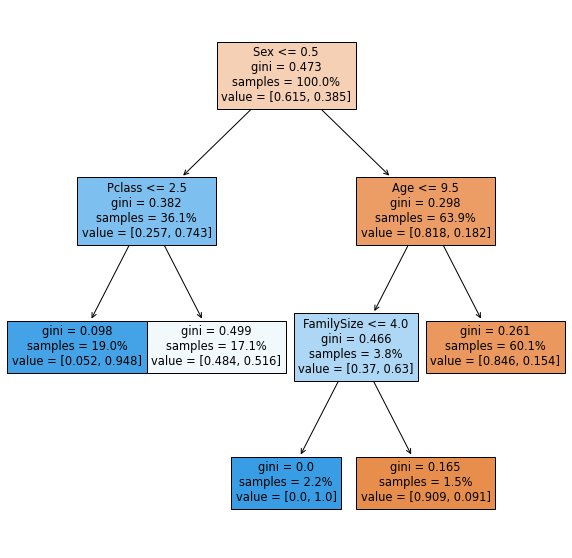

In [33]:
plt.figure(figsize = (10,10))
plot_tree(clftree, filled = True, feature_names = x.columns, proportion = True)
plt.show()

In [67]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [68]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [38]:
data.groupby('Sex')[['Survived', 'Age']].corr()

Survived       Age
Sex                             
0   Survived  1.000000  0.100590
    Age       0.100590  1.000000
1   Survived  1.000000 -0.106712
    Age      -0.106712  1.000000

In [39]:
data["Survived"].corr(data["Sex"])

-0.5433513806577546

graph interpretation : the feature used as the root is Sex, the Sex <=0.1 means 0 wich refers to male.61% survived the others are not.then with the internal node (Pclass) there are 25 % who survived.if (Pclass <=2.5, 94%) didn't suvive otherwise if (Pclass>2.5) then 48% survived. and so on.. 

### Decision tree with other parameters

In [41]:
clftree1 = tree.DecisionTreeClassifier( criterion = "entropy", min_samples_split  = 4, random_state=10)

In [42]:
clftree1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4,
                       random_state=10)

In [45]:
y_pred = clftree1.predict(x_test)

In [46]:
accuracy_score(y_pred,y_test)

0.8044692737430168

In [62]:
import graphviz

In [65]:
text_representation = tree.export_text(clftree1)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_3 <= 28.86
|   |   |   |--- feature_2 <= 37.00
|   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |--- feature_2 <= 25.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  25.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  37.00
|   |   |   |   |--- feature_3 <= 27.63
|   |   |   |   |   |--- feature_2 <= 39.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  39.00
|   |   |   |   |   |   |--- feature_2 <= 55.50
|   |   |   |   |   |   |   |--- feature_3 <= 25.96
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  25.96
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  55.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  27.63
|   |   |   |   |   |--- class

### interpretation

there is a difference between the two decision tree classifier; one uses gini_index with an accuracy of 0.77 and the other uses entropy with an accuracy of 0.8.


### random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
clfforest = RandomForestClassifier()

In [51]:
clfforest.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred= clfforest.predict(x_test)

In [58]:
accuracy_score(y_pred,y_test)

0.7877094972067039

In [59]:
clfforest1 = RandomForestClassifier(n_estimators=10)

In [60]:
clfforest.fit(x_train,y_train)
y_pred1= clfforest.predict(x_test)
accuracy_score(y_pred1,y_test)

0.8044692737430168